In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
df = pd.read_csv('transaction_data.csv')

In [4]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


**Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, 
число пропущенных значений и описательную статистику.
Вопрос: сколько в датасете пропущенных значений?**

In [6]:
df.shape

(5315, 3)

In [7]:
df['date'] = pd.to_datetime(df.date)

In [8]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [9]:
df.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [10]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

**Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? 
Визуализируйте результат с помощью барплота.
Расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)**

In [12]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [13]:
df_unique_transaction = df.groupby(['transaction'], as_index=False)\
    .agg({'name': 'count'})\
    .rename(columns=({'name': 'transaction_count'}))\
    .sort_values('transaction_count', ascending=False)

In [14]:
df_unique_transaction

,transaction,transaction_count
2,successfull,3692
0,cancelled,1619
1,error,4


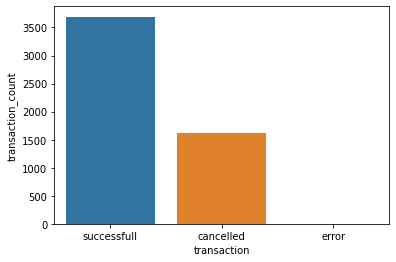

In [15]:
sns.barplot(x='transaction', y='transaction_count', data=df_unique_transaction)

**Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, 
совершённых каждым пользователем.**

In [72]:
successfull_transactions = df\
    .query('transaction == "successfull"')\
    .groupby(['name'], as_index=False)\
    .agg({'transaction': 'count'}) # или .size()

In [76]:
successfull_transactions.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


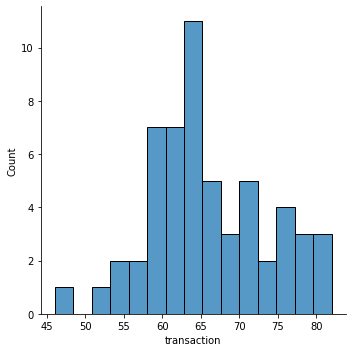

In [77]:
sns.displot(x='transaction', data=successfull_transactions, bins=15)

In [78]:
successfull_transactions.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


**К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:
столбцы – имена пользователей,
строки – минута времени осуществления операции (minute),
значения – число совершённых операций.
Пропущенные значения заполните нулями.**

In [94]:
user_vs_minute_pivot = pd.read_csv('transaction_data_updated.csv')

In [97]:
user_vs_minute_pivot

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [113]:
user_vs_minute_pivot\
    .groupby(['name', 'minute'], as_index=False)\
    .agg({'transaction': 'count'})\
    .pivot(index='minute', columns='name', values='transaction')\
    .fillna(0)
# pivot без reset_index, иначе выходит не то

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


**Коллега построил график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки. 
По оси x – минута транзакции (сколько минут прошло с начала дня),
по оси y – число транзакций.
Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. 
Результат сохраните в колонку true_minute. Постройте график, и посмотрите, произошли ли изменения**

In [137]:
df_updated = pd.read_csv('transaction_data_updated.csv')

In [138]:
df_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [139]:
df_updated['date'] = pd.to_datetime(df_updated.date)

In [140]:
df_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [151]:
df_updated = df_updated.assign(true_minute = df_updated.date.dt.minute + (df_updated.date.dt.hour*60))

In [153]:
df_updated.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [157]:
true_minute_df = df_updated\
    .groupby('true_minute', as_index=False)\
    .agg({'transaction': 'count'})

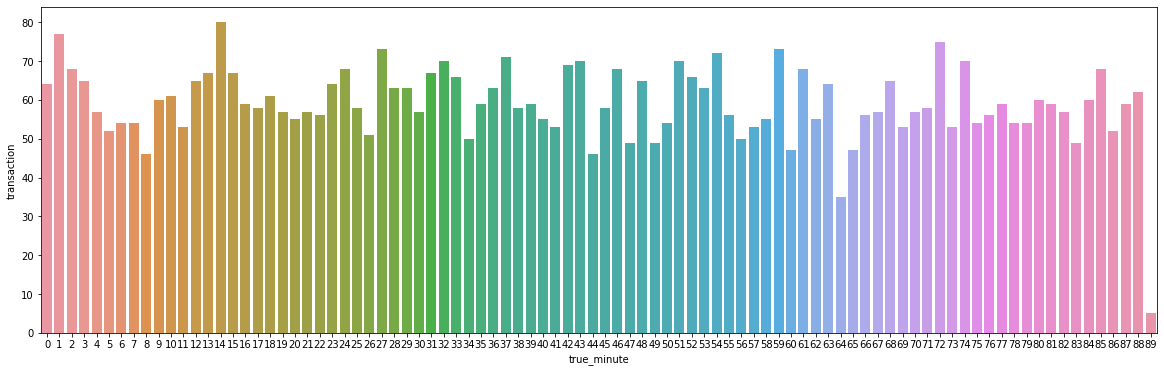

In [164]:
plt.figure(figsize=(20, 6))
sns.barplot(x='true_minute', y='transaction', data=true_minute_df)